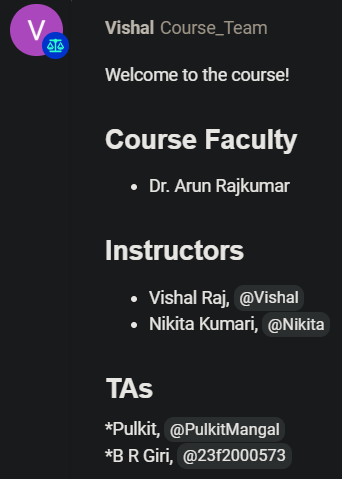
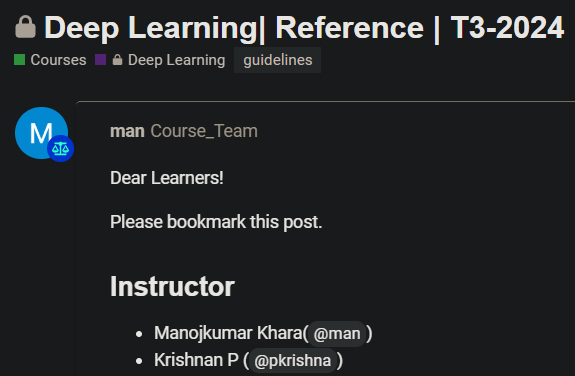
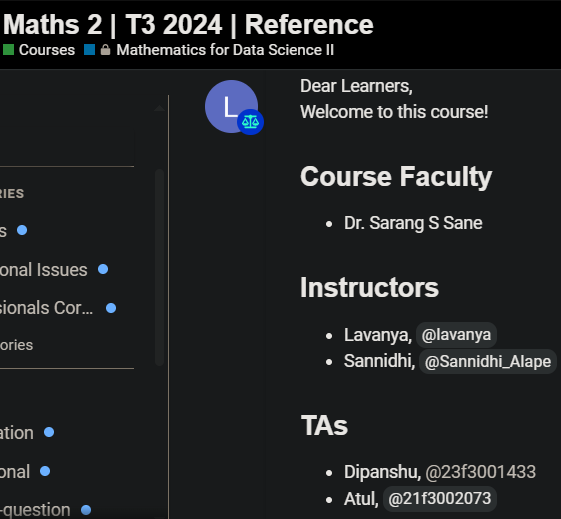

In [10]:
import requests,json, time
from pprint import pprint

# Get the API key and username from yaml

import yaml
with open("../key.yaml", "r") as file:
    api_keys = yaml.safe_load(file)

api_key = api_keys["API_KEY"]
api_username = "ShubhamG"
defaultHost = "discourse.onlinedegree.iitm.ac.in"

# Headers for authentication
headers = {
    'Api-Key': api_key,
    'Api-Username': api_username
}

In [57]:
# Keep the below code in a loop and increment the offset by 30 each time. The loop should break when the number of elements in the response is less than 30
offset = 0
data_dict ={"user_actions":[]}
username="23f2000573"
subject = "MLT"
# filter=5 #For the "user_replied_to_a_topic"
while True:
    time.sleep(0.2)
    endpoint = f'https://{defaultHost}/user_actions.json?username={username}&offset={offset}&after=2024-09-24'
    # Make the request
    response = requests.get(endpoint, 
                            headers=headers)

    # Check the response
    if response.status_code == 200:
        data = response.json()
        num_elements = len(data["user_actions"])
        data_dict["user_actions"].extend(data["user_actions"])
        offset+=30
        if offset%900==0:
            print(offset, len(data_dict["user_actions"]))
        if num_elements<30:
            break
    else:
        print(f'Error: {response.status_code}')
        break

900 900
1800 1775


In [58]:
print(len(data_dict["user_actions"]))
# # Dump the data dict as json file
# with open(f'userAction_{subject}_{username}.json', 'w') as f:
#     json.dump(data_dict, f, indent=4)


1775


In [59]:
# import json
# # Load the data dict from json file
# with open("userAction_Maths2_T3_2024_lavanya.json",'r') as f:
#     data_dict = json.load(f)

In [60]:
from datetime import datetime
# example "created_at": "2025-01-21T08:09:42.075Z"
# Filter the json file such that the "created at" is before 2024-12-29
target_date = datetime.strptime("2024-12-29", "%Y-%m-%d")

filtered_actions = [
    action for action in data_dict["user_actions"]
    if datetime.fromisoformat(action["created_at"][:-1]) <= target_date
]
len(filtered_actions)


1708

In [61]:
data_dict_2 = {}
data_dict_2["user_actions"] = filtered_actions
with open(f'userAction_{subject}_{username}.json', 'w') as f:
    json.dump(data_dict_2, f, indent=4)

In [25]:
filtered_actions

[{'excerpt': '<a class="mention" href="/u/sannidhi_alape">@Sannidhi_Alape</a> <a class="mention" href="/u/lavanya">@lavanya</a> \nInteresting question. \nOption 4, while the determinant and eigenvalues match, how does one conclude that they are not similar ? Jordan forms ? Are we expected to do such problems in quiz ? or is it only in GAs for general reading and expanding our knowledge ? \nIs it fair to&hellip;',
  'truncated': True,
  'action_type': 7,
  'created_at': '2024-11-27T06:28:43.038Z',
  'avatar_template': '/user_avatar/discourse.onlinedegree.iitm.ac.in/baskaran_nadar/{size}/114019_2.png',
  'acting_avatar_template': '/user_avatar/discourse.onlinedegree.iitm.ac.in/baskaran_nadar/{size}/114019_2.png',
  'slug': 'week-7-aq-7-1-question-6-7',
  'topic_id': 157368,
  'target_user_id': 37945,
  'target_name': 'Sannidhi Alape',
  'target_username': 'Sannidhi_Alape',
  'post_number': 3,
  'post_id': 559754,
  'username': 'Baskaran_Nadar',
  'name': 'Baskaran Nadar',
  'user_id': 37